# Mean Shift Clustering
This notebook provides a simple introduction to MeanShift clustering and is based from the official scikit documentation and examples.

In [1]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

#### Data is made with scikit's make_blobs generator.

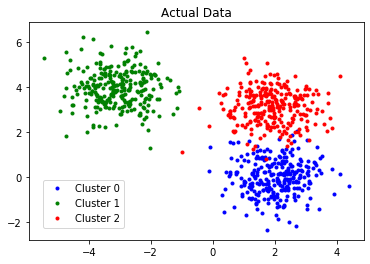

In [2]:
centers = [[2,0], [-3,4], [2,3]]
data, target = make_blobs(n_samples=800, centers=centers, cluster_std=0.8)

for cluster, color in zip(range(len(centers)), 'bgrcmyk'):
    mask = target == cluster

    # Plot data as point markers using matplotlib format '[marker][line][color]'
    fmt = '.' + '' + color
    plt.plot(data[mask, 0], data[mask, 1], fmt, label='Cluster ' + str(cluster))

plt.legend(loc='upper right', bbox_to_anchor=(0.3, 0.3), ncol=1)
plt.title('Actual Data')
plt.show()

#### Fitting the data with Meanshift and using scikit's estimate_bandwidth.
##### MeanShift bin seeding
Starting kernel locations are gridded across the data instead of set for every point, ensuring the algorithm is faster because it has to initialise fewer seeds.


In [3]:
import time
start_time = time.time()

# Bandwidth will be higher the further data is spread
bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=500)

model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model.fit(data)

print(model, end="\n\n")

print("--- Runtime {:0.2f} milliseconds ---".format((time.time() - start_time)*1000))

MeanShift(bandwidth=1.5157493708762584, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

--- Runtime 324.11 milliseconds ---


In [4]:
clusterCenters = model.cluster_centers_
numClusters = len(clusterCenters)

print("Clusters estimated:", numClusters)

Clusters estimated: 3


#### Visualisation
The following section is adapted from the scikit example code for MeanShift. Some parts have been changed for better clarity or further explanation.

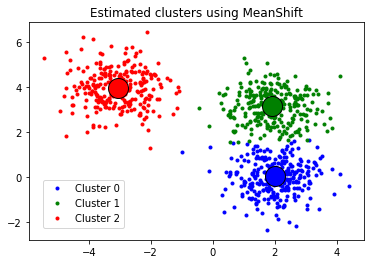

In [5]:
plt.figure(1)

for cluster, color in zip(range(numClusters), 'bgrcmyk'):
    mask = model.labels_ == cluster
    clusterCenter = clusterCenters[cluster]
    
    # Plot data as point markers using matplotlib format '[marker][line][color]'
    fmt = '.' + '' + color
    plt.plot(data[mask, 0], data[mask, 1], fmt, label='Cluster ' + str(cluster))
    
    # Add centers
    plt.plot(clusterCenter[0], clusterCenter[1], 'o', markersize=20, markerfacecolor=color, 
             markeredgecolor='k')

plt.legend(loc='upper right', bbox_to_anchor=(0.3, 0.3), ncol=1)
plt.title('Estimated clusters using MeanShift')
plt.show()

In [6]:
from scipy.stats import mode


labels = np.zeros_like(model.labels_)

for i in range(3):
    mask = (model.labels_ == i)
    labels[mask] = mode(target[mask])[0]

percent_acc = accuracy_score(target, labels) * 100
print("Percentage accurately labeled: \n{:>15.2f} %".format(percent_acc))

Percentage accurately labeled: 
          98.12 %
